In [16]:
import numpy as np
import keras
import pandas
from keras_tqdm import TQDMNotebookCallback
from sklearn import preprocessing

data = np.array(pandas.read_csv("~/S19-team2-project/new_trainingdata.csv", header=0))
## Have to drop all the rows that have nan values because they will not help with net
## clean out rows with nan values
data = data[~np.isnan(data).any(axis=1)]
np.random.shuffle(data)
print(data.shape)


(114, 9)


In [17]:
from sympy import *
init_printing(use_latex=True)

import matplotlib.pyplot as plt
%matplotlib inline

X = data[:,0:8]
X = preprocessing.scale(X)
print(X.shape)
display(X)

labels = data[:,8]
print(labels.shape)
display(labels)

Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

(114, 8)


array([[ 0.90634382,  1.09086305,  1.10530911,  0.91846349,  0.46388485,
         1.15631203, -0.3731387 ,  0.85789557],
       [ 1.25468256,  1.03236849,  0.55853757,  0.87361478,  0.57816295,
         1.65811607, -0.3731387 ,  1.27226234],
       [-0.3092873 ,  0.44011108,  0.63664779,  0.1816632 , -1.49788926,
        -0.75873607, -1.98651828,  0.11548844],
       [ 0.35895436, -0.02053357, -0.95680072, -1.01003118, -1.0598232 ,
         0.15270393,  1.38691175, -1.07581603],
       [ 0.37317227,  1.48361223,  0.9959548 ,  1.14270706,  0.57816295,
         1.72980237, -0.3731387 ,  1.27226234],
       [-1.43250202, -1.07343563,  0.49778517,  0.56964017,  1.07336806,
         0.00933135, -1.28575746,  0.4987777 ],
       [-0.28796044, -0.72246828, -0.86306846, -1.01003118, -0.75508159,
        -0.56415899,  0.73504121, -1.35206054],
       [ 0.88501695,  1.03236849,  1.10530911,  0.99321135,  0.42579215,
         1.08462573, -0.3731387 ,  0.90393632],
       [ 0.62909461, -0.63472644

(114,)


array([1., 1., 0., 0., 1., 2., 0., 1., 0., 2., 2., 0., 0., 1., 2., 0., 0.,
       2., 2., 1., 1., 0., 2., 2., 0., 1., 1., 0., 2., 1., 2., 2., 2., 2.,
       0., 2., 2., 2., 2., 0., 0., 2., 1., 1., 1., 1., 0., 2., 1., 2., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 2., 1., 0., 2., 2., 2., 0., 1.,
       1., 0., 0., 0., 0., 2., 2., 0., 0., 1., 1., 1., 1., 2., 1., 0., 0.,
       2., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 2., 0., 0., 1., 2., 1.])

In [18]:
input_size = X.shape[1]
output_size = Y.shape[1]
display(X.shape[1])

In [19]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(64,input_dim=8,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))
model.add(keras.layers.Dense(64,input_dim=8,activation='sigmoid', bias_initializer=keras.initializers.Constant(value=0.01)))

model.add(keras.layers.Dense(3,activation='softmax'))
#categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 4,931
Trainable params: 4,931
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
history = model.fit(X, Y,
    batch_size=56, 
    epochs=100, 
    verbose=0,
    callbacks=[TQDMNotebookCallback()],
    validation_split = 0.2)


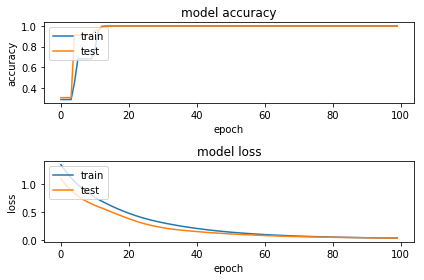

114/114 [==============================] - 0s 70us/step
Test loss: 0.028706450734222143
Test accuracy: 1.0


In [21]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [25]:
model.save_weights('MLN.weights')
model.save('MLN.model')

In [26]:
preds = model.predict(X, batch_size=1, verbose=1, steps=None)

for i in range(0,114):
    print(np.argmax(preds[i,]))

114/114 [==============================] - 0s 1ms/step
1
1
0
0
1
2
0
1
0
2
2
0
0
1
2
0
0
2
2
1
1
0
2
2
0
1
1
0
2
1
2
2
2
2
0
2
2
2
2
0
0
2
1
1
1
1
0
2
1
2
1
0
0
0
1
0
0
1
0
0
2
1
0
2
2
2
0
1
1
0
0
0
0
2
2
0
0
1
1
1
1
2
1
0
0
2
0
0
0
0
2
0
1
0
0
0
0
1
0
0
0
1
1
0
1
0
0
0
2
0
0
1
2
1
